# CBIR con ORB

In [75]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from google.colab.patches import cv2_imshow

Definimos las siguiente funciones para mostrar los resultados

In [76]:
def get_n_similar(n, counts, reverse):
    sorted_counts = sorted(counts.items(), key=lambda x:x[1], reverse=reverse)[:n] #Ordeno y me quedo con los 5 más parecidos
    sorted_indexes = [idx[0] for idx in sorted_counts]
    return sorted_indexes

def display_n_similar(sorted_indexes, n):
    if n <= 0:
        print("El valor de n debe ser mayor que 0.")
        return

    if n > len(sorted_indexes):
        print(f"Solo hay {len(sorted_indexes)} imágenes en la lista. Mostrando todas.")
        n = len(sorted_indexes)
    fig, axs = plt.subplots(1, n, figsize=(15,15))
    for i in range(n):
        n_carpeta = (sorted_indexes[i][0])
        n_img = (sorted_indexes[i][1])
        path = images_path[(n_carpeta, n_img)]
        im = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        axs[i].imshow(im)
        axs[i].axis('off')
        titulo = f'{n_carpeta}_{n_img}'
        axs[i].set_title(titulo)


    plt.show()

## Almacenamos los paths de todas las imagenes

In [77]:
n_imgs = 100
carpetas = ["autobus-n04487081", "clavos-n03804744", "coche-n02814533", "collarin-n03814639", "desatascador-n03970156",
         "gatos-n02123394", "mono-n02480495", "puentes-n04532670", "silla-n04099969", "perro-n02099601",
            "pato-n01855672", "pizza-n07873807", "mar-n09428293", "ipod-n03584254", "platano-n07753592", "mascara_gas-n03424325",
            "pajarita-n02883205", "mosca-n02190166", "helado-n07615774", "canon-n02950826"]

In [78]:
len(carpetas)

20

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
def get_images_path(carpetas, n_imgs):
    images_path = {}
    for carpeta in carpetas:
        for i in range(n_imgs):
            images_path[(carpeta[-7:], str(i))] = f'./dataset/{carpeta}/{carpeta[-9:]}_{str(i)}.JPEG'
    return images_path #Devuelve un diccionario en el que la clave es (carpeta, id), y los valores los paths


In [81]:
images_path = get_images_path(carpetas, n_imgs)
len(images_path)

2000

## Como funciona ORB

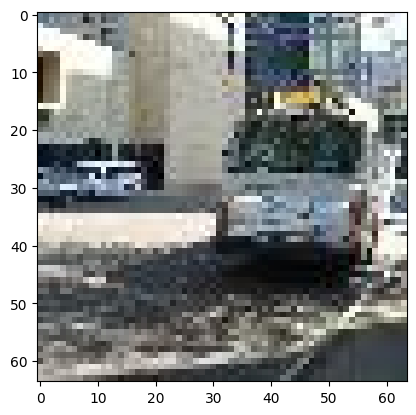

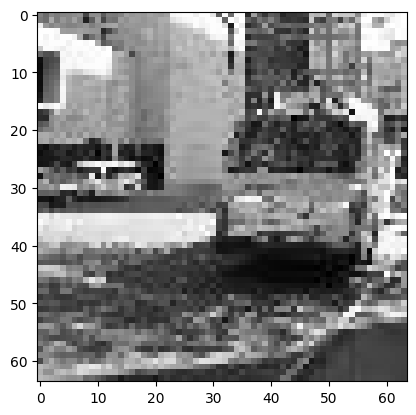

In [82]:
new_image_path = list(images_path.values())[random.randrange(0, len(carpetas)*n_imgs - 1)]
new_img = cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.show()
gray_im = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_im, cmap='gray')
plt.show()

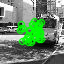

In [83]:
from google.colab.patches import cv2_imshow

# Tu código para detectar keypoints y dibujarlos en la imagen

# Crea un objeto ORB
orb = cv2.ORB_create(edgeThreshold=20)

# Detecta keypoints
keypoints = orb.detect(gray_im, None)

# Calcula los descriptores
keypoints, descriptors = orb.compute(gray_im, keypoints)

image_with_keypoints = cv2.drawKeypoints(gray_im, keypoints, None, color=(0, 255, 0), flags=0)

# Muestra la imagen con los keypoints
cv2_imshow( image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Aplicamos el detector ORB a todas nuestras imagenes

In [84]:
if os.path.exists('ORB_descriptors.npy'):
    corners = np.load('ORB_descriptors.npy')
else:
    corners = np.empty((0,34))
    orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2, nlevels=8, edgeThreshold=10)
    for idx in images_path:
        gray_im = cv2.cvtColor(cv2.imread(images_path[idx]), cv2.COLOR_BGR2GRAY)
        #gray_im = np.float32(gray_im)
        # Detecta los keypoints en la imagen
        keypoints = orb.detect(gray_im, None)
        # Extrae los descriptores de los keypoints
        _, descriptors = orb.compute(gray_im, keypoints)
        #descriptors= np.float32(descriptors)
        #print(descriptors)
        if np.any(descriptors):
            # Agrega información de carpeta y número de imagen a los descriptores
            descriptors = np.insert(np.float32(descriptors), 0, idx[1], axis=1)
            descriptors = np.insert(np.float32(descriptors), 0,idx[0] , axis=1)
            corners = np.vstack([corners, descriptors])

    np.save('ORB_descriptors', corners)


Se han truncado las últimas 5000 líneas del flujo de salida.
1376
[4.487081e+06 0.000000e+00 1.690000e+02 1.530000e+02 1.230000e+02
 7.200000e+01 8.400000e+01 2.010000e+02 2.310000e+02 2.490000e+02
 9.400000e+01 7.200000e+01 1.240000e+02 1.400000e+01 5.000000e+01
 2.210000e+02 5.200000e+01 3.600000e+01 1.240000e+02 1.040000e+02
 1.800000e+01 1.080000e+02 2.110000e+02 1.860000e+02 1.800000e+02
 1.830000e+02 1.250000e+02 4.500000e+01 3.300000e+01 1.100000e+02
 9.300000e+01 1.000000e+01 2.240000e+02 2.460000e+02]
1377
[4.487081e+06 0.000000e+00 1.690000e+02 1.530000e+02 1.230000e+02
 7.200000e+01 8.400000e+01 2.010000e+02 2.310000e+02 2.490000e+02
 9.400000e+01 7.200000e+01 1.240000e+02 1.400000e+01 5.000000e+01
 2.210000e+02 5.200000e+01 3.600000e+01 1.240000e+02 1.040000e+02
 1.800000e+01 1.080000e+02 2.110000e+02 1.860000e+02 1.800000e+02
 1.830000e+02 1.250000e+02 4.500000e+01 3.300000e+01 1.100000e+02
 9.300000e+01 1.000000e+01 2.240000e+02 2.460000e+02]
1378
[4.487081e+06 0.000000e+

In [85]:
corners.shape

(336390, 34)

In [86]:
corners[34]

array([4.487081e+06, 0.000000e+00, 1.120000e+02, 7.300000e+01,
       1.040000e+02, 7.300000e+01, 2.900000e+01, 2.030000e+02,
       7.100000e+01, 1.740000e+02, 7.000000e+01, 1.640000e+02,
       1.720000e+02, 1.000000e+01, 5.100000e+01, 1.700000e+01,
       3.000000e+00, 1.160000e+02, 7.200000e+01, 2.480000e+02,
       7.200000e+01, 7.200000e+01, 7.200000e+01, 4.200000e+01,
       1.150000e+02, 6.200000e+01, 2.410000e+02, 1.320000e+02,
       1.320000e+02, 6.100000e+01, 1.130000e+02, 5.600000e+01,
       8.400000e+01, 1.060000e+02])

## Entrenamos KNN

In [87]:
n_neighbors = 1000
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto', metric='hamming')

descriptors_train = corners[:, 2:] #Quitamos los dos primeros pertenecientes a indices de la imagen
knn.fit(descriptors_train)

NearestNeighbors(metric='hamming', n_neighbors=1000)

## Obtenemos las imagenes más similares a una nueva imagen

In [88]:
counts = {}

new_image_path = list(images_path.values())[random.randrange(0, len(carpetas)*n_imgs - 1)]
new_img = cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB)
gray_im_new = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2, nlevels=8, edgeThreshold=10)
keypoints = orb.detect(gray_im_new, None)
# Extrae los descriptores de los keypoints
_, descriptors = orb.compute(gray_im_new, keypoints)
new_corners = descriptors

for descriptor in new_corners:
    descriptor = descriptor.reshape(1, -1)
    distance, indice = knn.kneighbors(descriptor, n_neighbors=100)
    for idx in indice[0]:
        carpeta = str(int(corners[idx,0]))
        num_img = str(int(corners[idx,1]))
        id = (carpeta, num_img)
        if id in counts:
            counts[id] += 1
        else:
            counts[id] = 1

In [89]:
print(counts)

{('4487081', '12'): 649, ('3814639', '34'): 6, ('3804744', '13'): 52, ('2190166', '66'): 30, ('2190166', '69'): 40, ('2123394', '0'): 8, ('2814533', '62'): 13, ('3804744', '4'): 19, ('7753592', '97'): 11, ('4487081', '1'): 18, ('3424325', '81'): 9, ('2099601', '78'): 5, ('4099969', '36'): 23, ('2099601', '34'): 4, ('2099601', '91'): 21, ('7615774', '2'): 12, ('4487081', '47'): 7, ('2480495', '56'): 6, ('2099601', '23'): 31, ('7753592', '69'): 2, ('3424325', '55'): 9, ('2190166', '51'): 17, ('3970156', '84'): 6, ('3424325', '48'): 23, ('2123394', '53'): 35, ('2190166', '29'): 23, ('2950826', '79'): 38, ('2814533', '95'): 12, ('7615774', '66'): 8, ('3424325', '30'): 50, ('4487081', '0'): 5, ('7753592', '76'): 6, ('2950826', '10'): 14, ('3424325', '57'): 5, ('2480495', '19'): 4, ('2190166', '43'): 39, ('2883205', '39'): 14, ('3814639', '48'): 27, ('3584254', '21'): 13, ('1855672', '22'): 17, ('9428293', '91'): 14, ('3424325', '74'): 17, ('2123394', '39'): 16, ('4487081', '59'): 15, ('3424

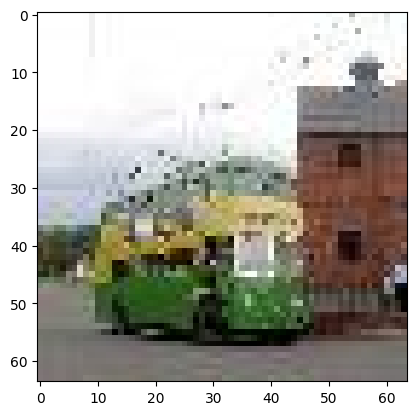

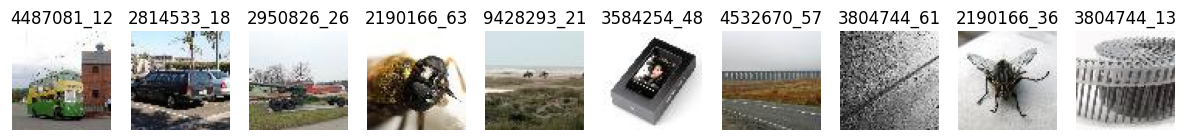

In [90]:
plt.imshow(new_img)
idx_similar = get_n_similar(10, counts, 1)
display_n_similar(idx_similar, 10)